------------------> **5x2cv paired t test** <------------------

In [1]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier 
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import paired_ttest_5x2cv

#Data
X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

#Models
model1 = LinearSVC(random_state=0, tol=1e-05)
model2 = KNeighborsClassifier(n_neighbors=5)


#Fit
score1 = model1.fit(X_train, y_train).score(X_test, y_test)
score2 = model2.fit(X_train, y_train).score(X_test, y_test)

print('LinearSVC accuracy: %.2f%%' % (score1*100))
print('KNeighborsClassifier accuracy: %.2f%%' % (score2*100))


#Statistical test
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='accuracy', random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

LinearSVC accuracy: 92.11%
KNeighborsClassifier accuracy: 97.37%
t statistic: 0.000
p value: 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

------------------> McNemar test <------------------

----------------LinearSVC Classifier--------------
LinearSVC accuracy: 92.11%
----------------KNeighborsClassifier--------------
KNeighborsClassifier accuracy: 97.37%
----------------McNemar test--------------
[[35  2]
 [ 0  1]]
chi-squared: 0
p-value: 0.5
------------------------------
Linear SVC confusion matrix
[[18  0  0]
 [ 0  6  2]
 [ 0  1 11]]
------------------------------
KNN confusion matrix


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]


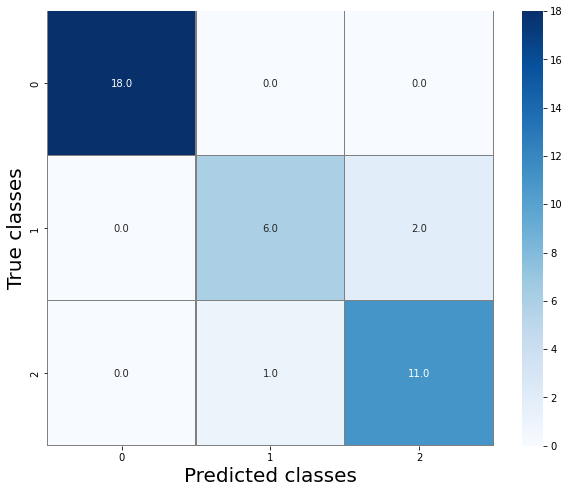

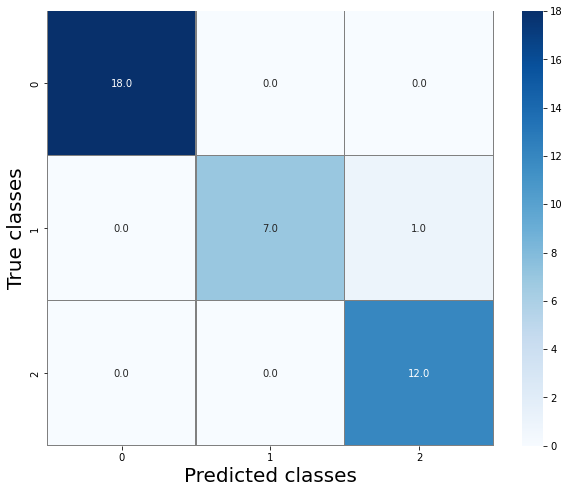

In [4]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier 
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

#Data
X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
y_target = y_test


#Linear SVC
print('----------------LinearSVC Classifier--------------')
model1 = LinearSVC(random_state=0, tol=1e-05)
score1 = model1.fit(X_train, y_train).score(X_test, y_test)
y_model1= model1.fit(X_train, y_train).predict(X_test)
print('LinearSVC accuracy: %.2f%%' % (score1*100))


#KNN
print('----------------KNeighborsClassifier--------------')
model2 = KNeighborsClassifier(n_neighbors=5)
score2 = model2.fit(X_train, y_train).score(X_test, y_test)
y_model2= model2.fit(X_train, y_train).predict(X_test)
print('KNeighborsClassifier accuracy: %.2f%%' % (score2.mean()*100))



#McNemar test
print('----------------McNemar test--------------')
# Tabla de McNemar
tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)

# Cálculo de valor de Xi
chi2, p = mcnemar(ary=tb, exact=True, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)


#Linear SVC confusion matrix
print('------------------------------')
print('Linear SVC confusion matrix')
model1ConfusionMatrix = confusion_matrix(y_test, y_model1)
plt.figure(figsize = (10,8))
sns.heatmap(model1ConfusionMatrix, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)
print(model1ConfusionMatrix)


#KNN confusion matrix
print('------------------------------')
print('KNN confusion matrix')
model2ConfusionMatrix = confusion_matrix(y_test, y_model2)
plt.figure(figsize = (10,8))
sns.heatmap(model2ConfusionMatrix, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)
print(model2ConfusionMatrix)
